In [1]:
#load dataset
from datasets import load_dataset

In [2]:
cifar_100 = load_dataset("uoft-cs/cifar100")

In [3]:
cifar_100

DatasetDict({
    train: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 10000
    })
})

In [4]:
#fine_id to label
id2labels = {
    0: "apple",
    1: "aquarium_fish",
    2: "baby",
    3: "bear",
    4: "beaver",
    5: "bed",
    6: "bee",
    7: "beetle",
    8: "bicycle",
    9: "bottle",
    10: "bowl",
    11: "boy",
    12: "bridge",
    13: "bus",
    14: "butterfly",
    15: "camel",
    16: "can",
    17: "castle",
    18: "caterpillar",
    19: "cattle",
    20: "chair",
    21: "chimpanzee",
    22: "clock",
    23: "cloud",
    24: "cockroach",
    25: "couch",
    26: "cra",   # (this looks like a typo? maybe "crab"?)
    27: "crocodile",
    28: "cup",
    29: "dinosaur",
    30: "dolphin",
    31: "elephant",
    32: "flatfish",
    33: "forest",
    34: "fox",
    35: "girl",
    36: "hamster",
    37: "house",
    38: "kangaroo",
    39: "keyboard",
    40: "lamp",
    41: "lawn_mower",
    42: "leopard",
    43: "lion",
    44: "lizard",
    45: "lobster",
    46: "man",
    47: "maple_tree",
    48: "motorcycle",
    49: "mountain",
    50: "mouse",
    51: "mushroom",
    52: "oak_tree",
    53: "orange",
    54: "orchid",
    55: "otter",
    56: "palm_tree",
    57: "pear",
    58: "pickup_truck",
    59: "pine_tree",
    60: "plain",
    61: "plate",
    62: "poppy",
    63: "porcupine",
    64: "possum",
    65: "rabbit",
    66: "raccoon",
    67: "ray",
    68: "road",
    69: "rocket",
    70: "rose",
    71: "sea",
    72: "seal",
    73: "shark",
    74: "shrew",
    75: "skunk",
    76: "skyscraper",
    77: "snail",
    78: "snake",
    79: "spider",
    80: "squirrel",
    81: "streetcar",
    82: "sunflower",
    83: "sweet_pepper",
    84: "table",
    85: "tank",
    86: "telephone",
    87: "television",
    88: "tiger",
    89: "tractor",
    90: "train",
    91: "trout",
    92: "tulip",
    93: "turtle",
    94: "wardrobe",
    95: "whale",
    96: "willow_tree",
    97: "wolf",
    98: "woman",
    99: "worm"
}


In [5]:
#coarse_id to label
coarse_id2labels = {
    0: "aquatic_mammals",
    1: "fish",
    2: "flowers",
    3: "food_containers",
    4: "fruit_and_vegetables",
    5: "household_electrical_devices",
    6: "household_furniture",
    7: "insects",
    8: "large_carnivores",
    9: "large_man-made_outdoor_things",
    10: "large_natural_outdoor_scenes",
    11: "large_omnivores_and_herbivores",
    12: "medium_mammals",
    13: "non-insect_invertebrates",
    14: "people",
    15: "reptiles",
    16: "small_mammals",
    17: "trees",
    18: "vehicles_1",
    19: "vehicles_2"
}


In [6]:
#split dataset into train and test

train_set = cifar_100['train']
test_set = cifar_100['test']

#print sample

print("train Sample: " , train_set[0])
print("test sample: " , test_set[0])

train Sample:  {'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x222F6D442E0>, 'fine_label': 19, 'coarse_label': 11}
test sample:  {'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x222F6D44100>, 'fine_label': 49, 'coarse_label': 10}


Text(0.5, 1.0, "('cattle', ', ', 'large_omnivores_and_herbivores')")

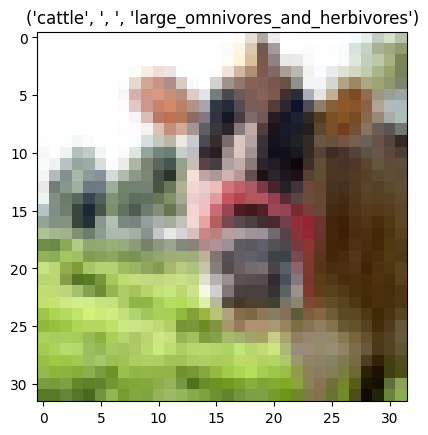

In [7]:
#dataset visualization

import matplotlib.pyplot as plt

image = train_set[0].get('img')
fine_id = int(train_set[0].get('fine_label'))
coarse_id = int(train_set[0].get('coarse_label'))
fine_label = id2labels[fine_id]
coarse_label = coarse_id2labels[coarse_id]


plt.imshow(image)
plt.title((fine_label, ", " , coarse_label))

In [8]:
#plot data in batch of id and coarse id
import matplotlib.pyplot as plt

def plot_image(number_of_image):
    fine_labels = cifar_100["train"].features["fine_label"].names
    fig, axes = plt.subplots(1, number_of_image, figsize=(20, 2))

    for i, ax in enumerate(axes):
        example =cifar_100['train'][i]
        
        img = example["img"]
        label = fine_labels[example["fine_label"]]
        
        ax.imshow(img)
        ax.set_title(label, fontsize=8)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    return

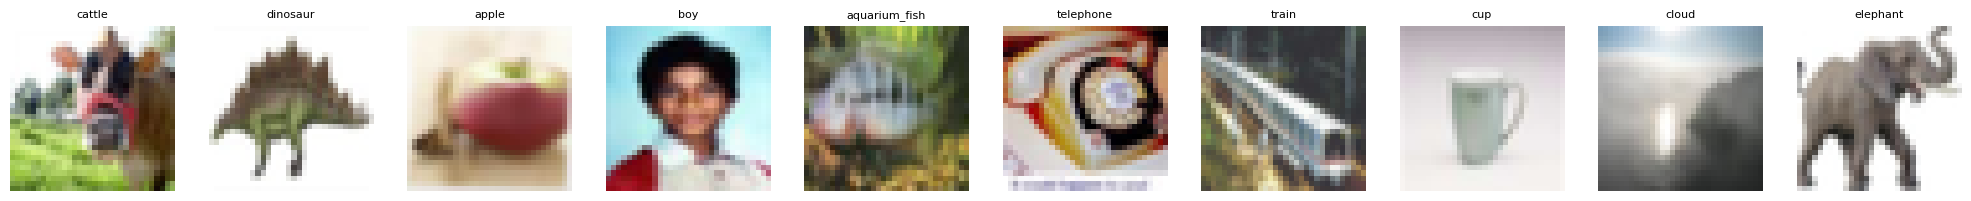

In [9]:
plot_image(10)

In [24]:
import pandas as pd
import numpy as np

# convert HF datasets to pandas
train_df = cifar_100["train"].to_pandas()
test_df = cifar_100["test"].to_pandas()

# add human readable labels
train_df["fine_label_name"] = train_df["fine_label"].map(id2labels)
train_df["coarse_label_name"] = train_df["coarse_label"].map(coarse_id2labels)

test_df["fine_label_name"] = test_df["fine_label"].map(id2labels)
test_df["coarse_label_name"] = test_df["coarse_label"].map(coarse_id2labels)

# optional: store images as numpy arrays (memory heavy)
train_df["img_arr"] = train_df["img"].apply(lambda im: np.array(im))
test_df["img_arr"] = test_df["img"].apply(lambda im: np.array(im))


train_df.drop(columns= ['img', 'img_arr'], inplace= True)
test_df.drop(columns=['img', 'img_arr'], inplace=True)

print("train dataset in pandas: ")
train_df.head()

print('test dataset in pandas: ')
test_df.head()

train dataset in pandas: 
test dataset in pandas: 


,fine_label,coarse_label,fine_label_name,coarse_label_name
0,49,10,mountain,large_natural_outdoor_scenes
1,33,10,forest,large_natural_outdoor_scenes
2,72,0,seal,aquatic_mammals
3,51,4,mushroom,fruit_and_vegetables
4,71,10,sea,large_natural_outdoor_scenes


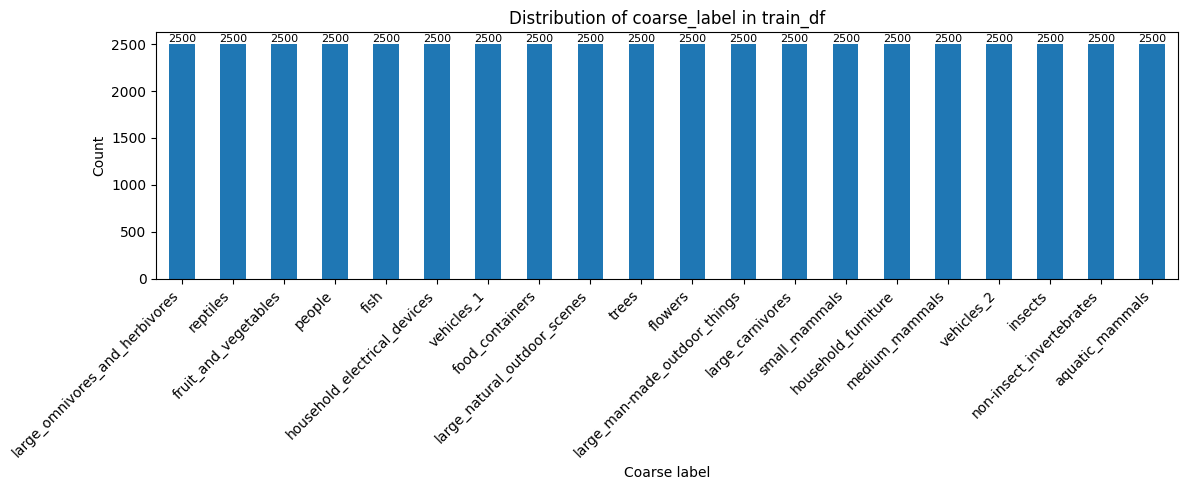

20


In [32]:
# plot distribution of coarse labels in train_df
counts = train_df["coarse_label_name"].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
counts.plot(kind="bar", ax=ax, color="C0")
ax.set_xlabel("Coarse label")
ax.set_ylabel("Count")
ax.set_title("Distribution of coarse_label in train_df")
plt.xticks(rotation=45, ha="right")

# annotate counts on bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

print(train_df['coarse_label_name'].unique().__len__())

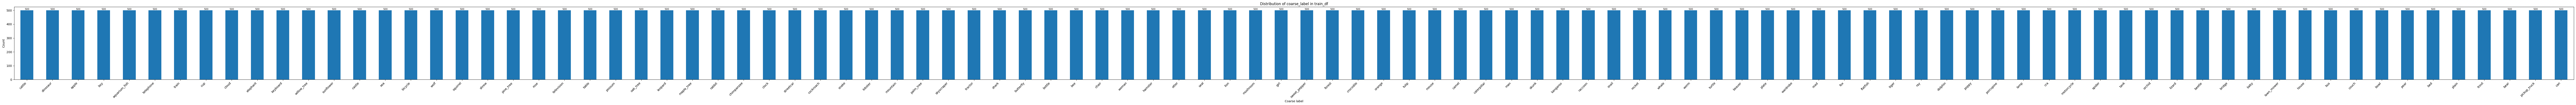

100


In [33]:
#plot the distribution of the fine_label in the train_df
counts = train_df["fine_label_name"].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(120, 5))
counts.plot(kind="bar", ax=ax, color="C0")
ax.set_xlabel("Coarse label")
ax.set_ylabel("Count")
ax.set_title("Distribution of coarse_label in train_df")
plt.xticks(rotation=45, ha="right")

# annotate counts on bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

print(train_df['fine_label_name'].unique().__len__())

In [34]:
#i dont know